# Autor: Renzo Reyna

###### Contacto:

- desarrollador.sarmientino@gmail.com
- DS.techsolutions@outlook.com


###### Web site: www.desarrolladorsarmientino.com

# Análisis del sistema educativo Departamento Totoral (nivel primario)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
leer_inscritos_primaria= pd.read_csv("datos_escuelas_primaria//alumnos_matriculados_primario_1998-2021.csv", 
                                     sep=';')

In [3]:
df_inscritos_primario= pd.DataFrame(leer_inscritos_primaria)

df_inscritos_primario.head(3)

,Departamento,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Calamuchita,5354,5429,5439,5375,5477,5474,5501,5514,5614,...,6333,6496,6683,6654,6698,6736,6766,6781,6818,6972
1,Capital,149286,150343,150953,150664,150179,147503,146300,145570,139713,...,144054,143355,143108,142607,142556,142132,141663,142105,141785,141061
2,Colon,21410,22365,23573,23739,24346,24303,24716,24941,24330,...,26967,26932,27402,27697,27686,27878,28213,28324,28467,28624


In [4]:
incritos_primario_totoral= df_inscritos_primario.iloc[23]

incritos_primario_totoral= pd.DataFrame(incritos_primario_totoral)

incritos_primario_totoral.reset_index(inplace=True)


In [5]:
incritos_primario_totoral= incritos_primario_totoral.rename(columns={'index':'Año', 23: 'Total inscritos'})

incritos_primario_totoral= incritos_primario_totoral.drop(0)

incritos_primario_totoral.head(3)

,Año,Total inscritos
1,1998,2188
2,1999,2193
3,2000,2173


In [6]:
leer_inscritos_segun_genero= pd.read_csv("datos_escuelas_primaria//alumnos_matriculados_primario_segun_genero_1998-2021.csv", 
                                     sep=';')

In [7]:
df_inscritos_segun_genero= pd.DataFrame(leer_inscritos_segun_genero)

df_inscritos_segun_genero.head(3)

,Departamento,Varones 1998,Mujeres 1998,Varones 1999,Mujeres 1999,Varones 2000,Mujeres 2000,Varones 2001,Mujeres 2001,Varones 2002,...,Varones 2017,Mujeres 2017,Varones 2018,Mujeres 2018,Varones 2019,Mujeres 2019,Varones 2020,Mujeres 2020,Varones 2021,Mujeres 2021
0,Calamuchita,2714,2715,2803,2626,2791,2648,2696,2679,2813,...,3524,3212,3464,3302,3465,3316,3483,3335,3600,3372
1,Capital,75438,73848,76251,74092,76438,74515,76472,74192,76230,...,72214,69918,72034,69629,72313,69792,71920,69865,71270,69791
2,Colon,10951,10459,11383,10982,12124,11449,12152,11587,12443,...,14246,13632,14476,13737,14471,13853,14580,13887,14743,13881


In [8]:
incritos_primario_segun_genero_totoral= df_inscritos_segun_genero.loc[23]

incritos_primario_segun_genero_totoral.head(3)

Departamento     Totoral
Varones 1998        1104
Mujeres 1998        1084
Name: 23, dtype: object

In [9]:
incritos_primario_segun_genero_totoral= pd.DataFrame(incritos_primario_segun_genero_totoral)

incritos_primario_segun_genero_totoral.reset_index(inplace=True)


In [10]:
incritos_primario_segun_genero_totoral= incritos_primario_segun_genero_totoral.drop(0)

incritos_primario_segun_genero_totoral= incritos_primario_segun_genero_totoral.rename(columns={'index':'Año - Género', 23:'Total inscriptos'})

In [11]:

incritos_primario_segun_genero_totoral.head(3)

,Año - Género,Total inscriptos
1,Varones 1998,1104
2,Mujeres 1998,1084
3,Varones 1999,1118


In [12]:
incritos_primario_segun_genero_totoral[['Género', 'Año']] = incritos_primario_segun_genero_totoral['Año - Género'].str.split(
                                                                                                            ' ', expand=True)

incritos_primario_segun_genero_totoral= incritos_primario_segun_genero_totoral.pivot_table(index='Año', columns='Género', 
                                                                           values='Total inscriptos').reset_index()

incritos_primario_segun_genero_totoral.columns.name = None  
incritos_primario_segun_genero_totoral.columns = ['Año', 'Mujeres', 'Varones']


In [13]:
incritos_primario_segun_genero_totoral.head(3)

,Año,Mujeres,Varones
0,1998,1084.0,1104.0
1,1999,1075.0,1118.0
2,2000,1074.0,1099.0


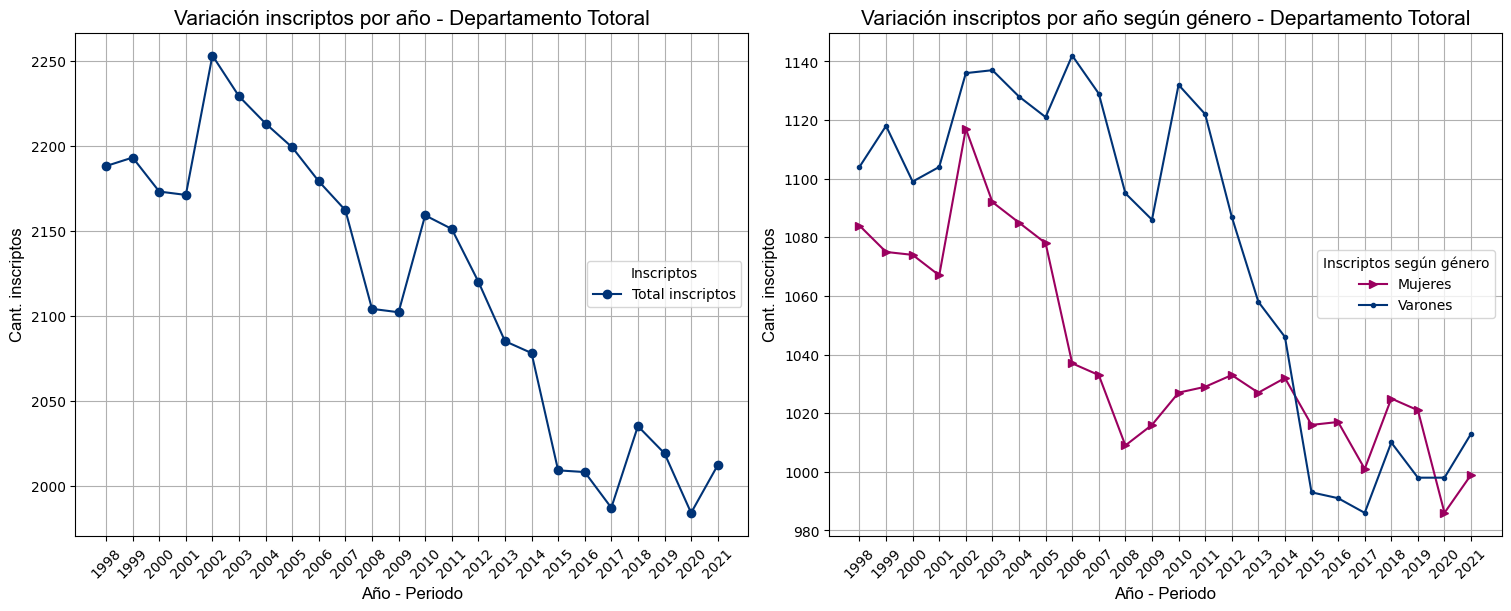

In [14]:
fig, ax= plt.subplots(nrows=1, ncols=2, layout='constrained', figsize=(15, 6))

ax[0].plot(incritos_primario_totoral['Año'], incritos_primario_totoral['Total inscritos'], 
           color='#003376', marker='o', label='Total inscriptos')
ax[0].set_title('Variación inscriptos por año - Departamento Totoral',
               fontdict={'fontfamily':'Arial', 'fontsize':15})
ax[0].set_xlabel('Año - Periodo', fontdict={'fontfamily':'Arial', 'fontsize':12})
ax[0].set_ylabel('Cant. inscriptos', fontdict={'fontfamily':'Arial', 'fontsize':12})
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(loc='right', title='Inscriptos')
ax[0].grid()

ax[1].plot(incritos_primario_segun_genero_totoral['Año'], incritos_primario_segun_genero_totoral['Mujeres'], 
           color='#9B005F', label='Mujeres', marker='>')
ax[1].plot(incritos_primario_segun_genero_totoral['Año'], incritos_primario_segun_genero_totoral['Varones'], 
           color='#003376', label='Varones', marker='.')
ax[1].set_title('Variación inscriptos por año según género - Departamento Totoral',
               fontdict={'fontfamily':'Arial','fontsize':15})
ax[1].set_xlabel('Año - Periodo', fontdict={'fontfamily':'Arial', 'fontsize':12})
ax[1].set_ylabel('Cant. inscriptos', fontdict={'fontfamily':'Arial', 'fontsize':12})
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(loc='right', title='Inscriptos según género')
ax[1].grid()
plt.show()

In [15]:
leer_datos_alumnos_sobreedad= pd.read_csv("datos_escuelas_primaria\\alumnos_con_sobredad_primario_1998-2021.csv", sep=';')

In [16]:
df_alumnos_sobreedad= pd.DataFrame(leer_datos_alumnos_sobreedad)

df_alumnos_sobreedad.head(3)

,Departamento,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Calamuchita,"24,2","20,9","21,1","22,7","22,7","23,4","21,6",25,"16,4",...,21,"17,9","12,8","10,5",8,"5,9","4,5","4,2","3,6","1,9"
1,Capital,"17,1","17,7","17,8","19,8","18,2","18,4","16,9","15,6","13,7",...,"13,2","11,2","9,1","7,3","6,4","5,1","3,9","2,9","2,9","2,5"
2,Colon,"25,7","22,6","23,8","22,8","23,6","23,6","22,9","19,2","17,5",...,"15,6","14,4","11,8","9,6","7,7","6,4","6,3","4,8","4,7","3,8"


In [17]:
alumnos_sobreedad_totoral= df_alumnos_sobreedad.iloc[23]

alumnos_sobreedad_totoral= pd.DataFrame(alumnos_sobreedad_totoral)

alumnos_sobreedad_totoral.head(3)

,23
Departamento,Totoral
1998,"33,3"
1999,"30,7"


In [18]:
alumnos_sobreedad_totoral.reset_index(inplace=True)

alumnos_sobreedad_totoral.head(3)

,index,23
0,Departamento,Totoral
1,1998,"33,3"
2,1999,"30,7"


In [19]:
alumnos_sobreedad_totoral= alumnos_sobreedad_totoral.rename(columns={'index':'Año', 23:'Porcentaje anual'})

alumnos_sobreedad_totoral= alumnos_sobreedad_totoral.drop(0)

In [20]:
alumnos_sobreedad_totoral['Porcentaje anual'] = alumnos_sobreedad_totoral['Porcentaje anual'].str.replace(',', '.').astype(float)

alumnos_sobreedad_totoral.head(3)

,Año,Porcentaje anual
1,1998,33.3
2,1999,30.7
3,2000,33.2


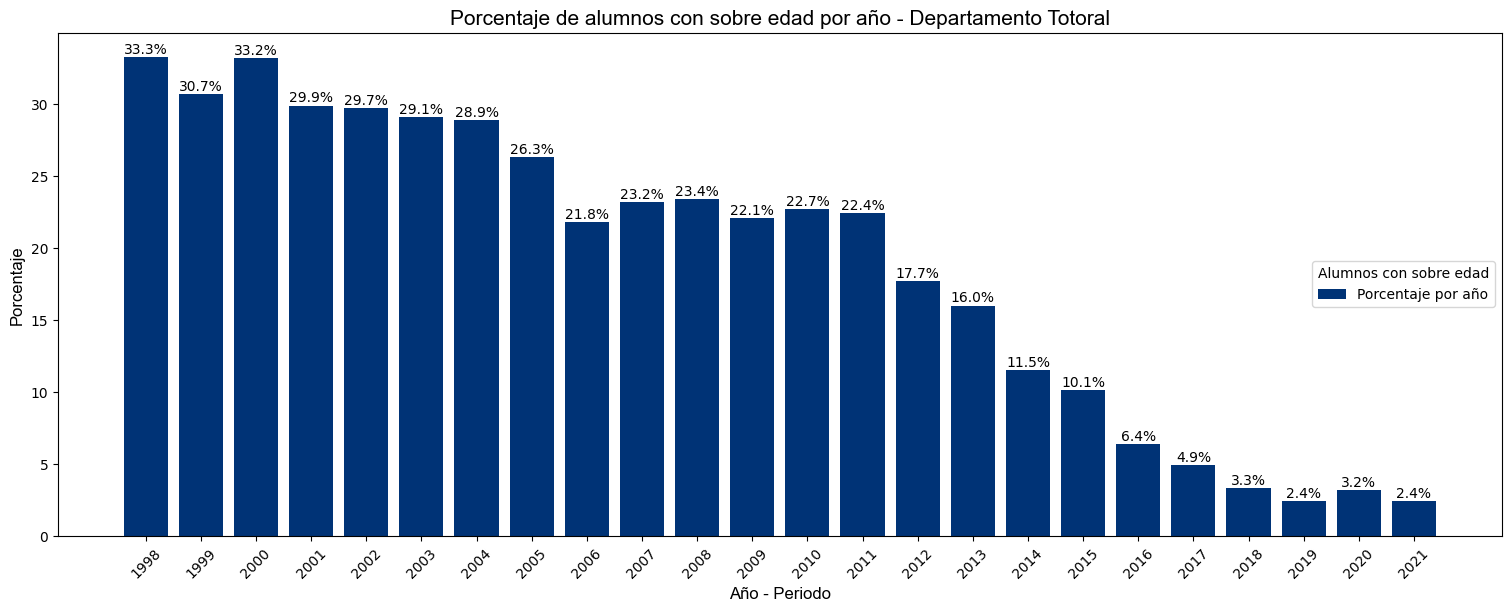

Promedio de alumnos con sobre edad durante el periodo 1998 - 2021: 18.94166666666666 %


In [21]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(15, 6), layout='constrained')

ax.bar(alumnos_sobreedad_totoral['Año'], alumnos_sobreedad_totoral['Porcentaje anual'],
      label='Porcentaje por año', color='#003376')
ax.set_title('Porcentaje de alumnos con sobre edad por año - Departamento Totoral', 
             fontdict={'fontfamily':'Arial', 'fontsize':15})
ax.set_xlabel('Año - Periodo', fontdict={'fontfamily':'Arial', 'fontsize':12})
ax.set_ylabel('Porcentaje', fontdict={'fontfamily':'Arial', 'fontsize':12})

ax.tick_params(axis='x', rotation=45)

for i, porcentaje in enumerate(alumnos_sobreedad_totoral['Porcentaje anual']):
    ax.text(i, porcentaje + 0.05, str(round(porcentaje, 2)) + '%', ha='center', va='bottom')
    
ax.legend(title='Alumnos con sobre edad', loc='right')
plt.show()

print("Promedio de alumnos con sobre edad durante el periodo 1998 - 2021:", 
      np.mean(alumnos_sobreedad_totoral['Porcentaje anual']),'%')


In [22]:
leer_Datos_Alumnos_repitentes= pd.read_csv('datos_escuelas_primaria\\alumnos_repitentes_primario_1998-2021.csv', sep=';') 

In [23]:
df_alumnos_repitentes= pd.DataFrame(leer_Datos_Alumnos_repitentes)

df_alumnos_repitentes.head(3)

,Departamento,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Calamuchita,"7,5","8,3","7,2","6,5","5,3","4,4",6,"5,5","5,1",...,"3,6","2,8","2,4","2,5","2,8","2,6",1,"1,6","1,2","0,6"
1,Capital,"5,7",6,"5,7",5,"3,8","3,6","3,4","3,7","3,9",...,"2,2","1,7","1,6","1,4","1,2","1,9","0,8","0,6","0,5","0,3"
2,Colon,"7,4","8,1","7,1","7,4","6,3","5,9","5,1","5,2","4,9",...,"2,5","2,2",2,"1,6","1,3","2,4","1,3","1,3","1,7","0,9"


In [24]:
alumnos_repitentes_totoral= df_alumnos_repitentes.iloc[23]

alumnos_repitentes_totoral= pd.DataFrame(alumnos_repitentes_totoral)

alumnos_repitentes_totoral.head(3)

,23
Departamento,Totoral
1998,"11,9"
1999,"11,6"


In [25]:
alumnos_repitentes_totoral.reset_index(inplace=True)

alumnos_repitentes_totoral.head(3)

,index,23
0,Departamento,Totoral
1,1998,"11,9"
2,1999,"11,6"


In [26]:
alumnos_repitentes_totoral= alumnos_repitentes_totoral.rename(columns={'index':'Año', 23:'Porcentaje'})

alumnos_repitentes_totoral= alumnos_repitentes_totoral.drop(0)

In [27]:
alumnos_repitentes_totoral['Porcentaje']= alumnos_repitentes_totoral['Porcentaje'].str.replace(',','.').astype(float)

alumnos_repitentes_totoral.head(3)

,Año,Porcentaje
1,1998,11.9
2,1999,11.6
3,2000,13.3


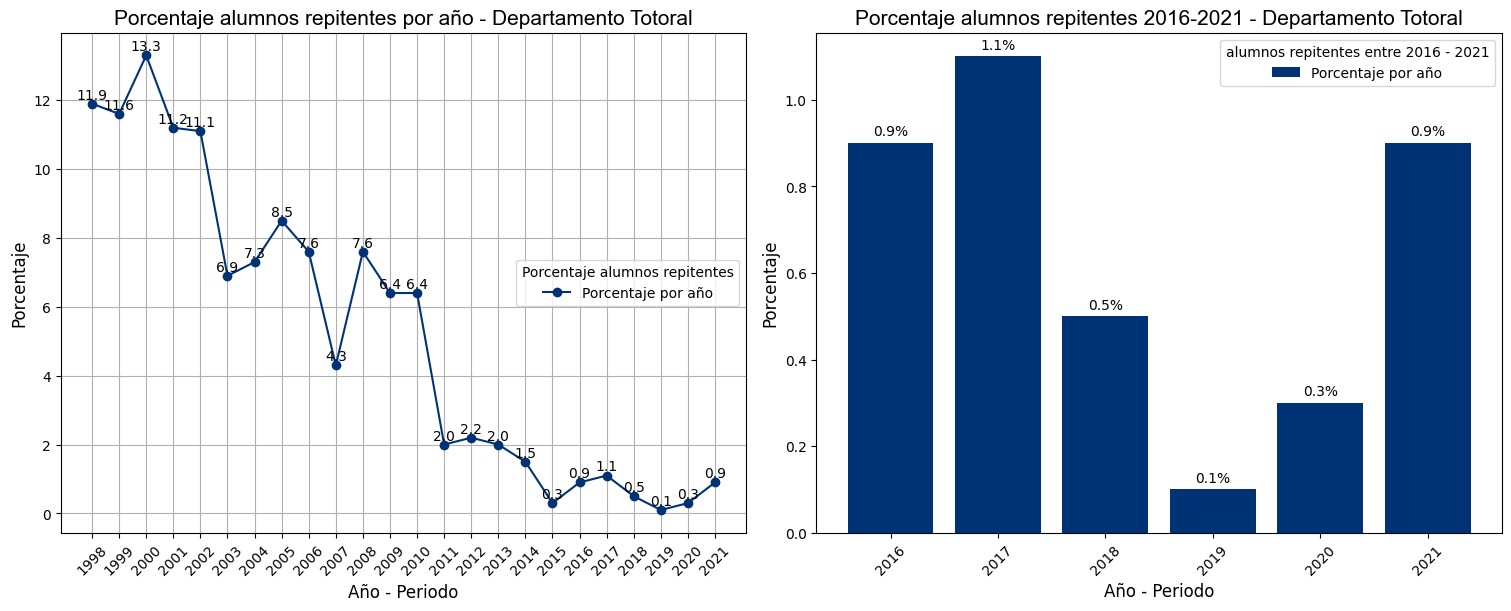

Promedio de alumnos repitentes por año durante el periodo 1998 - 2021: 5.245833333333333 %


In [28]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(15, 6), layout='constrained')

ax[0].plot(alumnos_repitentes_totoral['Año'], alumnos_repitentes_totoral['Porcentaje'],
          color='#003376', marker='o', label='Porcentaje por año')

ax[0].set_title('Porcentaje alumnos repitentes por año - Departamento Totoral', 
               fontdict={'fontsize': 15, 'fontfamily':'Arial'})
ax[0].set_xlabel('Año - Periodo', fontsize=12)
ax[0].set_ylabel('Porcentaje', fontsize=12)

for i, porcentaje in enumerate(alumnos_repitentes_totoral['Porcentaje']):
    ax[0].text(i, porcentaje + 0.05, round(porcentaje, 2), ha='center', va='bottom')
    
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid()
ax[0].legend(title='Porcentaje alumnos repitentes', loc='right')




bars= ax[1].bar(alumnos_repitentes_totoral['Año'].iloc[18:24], alumnos_repitentes_totoral['Porcentaje'].iloc[18:24],
               color='#003376', label='Porcentaje por año')

ax[1].set_title('Porcentaje alumnos repitentes 2016-2021 - Departamento Totoral',
                fontdict={'fontsize': 15, 'fontfamily':'Arial'})

for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, str(round(yval, 2)) + '%', ha='center', va='bottom')

ax[1].set_xlabel('Año - Periodo', fontsize=12)
ax[1].set_ylabel('Porcentaje', fontsize=12)

    
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='alumnos repitentes entre 2016 - 2021', loc='upper right')

plt.show()

print('Promedio de alumnos repitentes por año durante el periodo 1998 - 2021:', 
      np.mean(alumnos_repitentes_totoral['Porcentaje']), '%')


# Análisis del sistema educativo Departamento Totoral (nivel secundario)

In [29]:
leer_datos_alumnos_inscriptos= pd.read_csv('datos_escuelas_secundaria/alumnos_matriculados_secundario_1998-2021.csv', 
                                           sep=';')

In [30]:
df_leer_datos_alumnos_inscriptos= pd.DataFrame(leer_datos_alumnos_inscriptos)

df_leer_datos_alumnos_inscriptos.head(3)

,Departamento,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Calamuchita,3371,3445,3461,3628,3816,4011,4188,4240,4225,...,4886,5090,5200,5590,5829,6064,6262,6467,6704,7150
1,Capital,114522,112021,110978,112669,114849,118194,119311,119174,119824,...,122775,123193,124221,126211,127244,128144,128935,129446,129601,132807
2,Colon,13027,13705,14052,14614,15409,16168,16533,17209,17762,...,21305,21785,22389,23367,23824,24326,24723,25265,25731,26844


In [31]:
alumnos_inscriptos_totoral= df_leer_datos_alumnos_inscriptos.iloc[23]

alumnos_inscriptos_totoral= pd.DataFrame(alumnos_inscriptos_totoral)

alumnos_inscriptos_totoral.reset_index(inplace=True)

In [32]:
alumnos_inscriptos_totoral= alumnos_inscriptos_totoral.rename(columns={'index':'Año', 23:'Total inscriptos'}).drop(0)

alumnos_inscriptos_totoral.head(3)

,Año,Total inscriptos
1,1998,1131
2,1999,1130
3,2000,1204


In [33]:
leer_datos_inscritptos_segun_genero= pd.read_csv('datos_escuelas_secundaria/alumnos_matriculados_secundario_segun_genero_2006-2021.csv', 
                                                 sep=';')

In [34]:
df_inscriptos__segun_genero= pd.DataFrame(leer_datos_inscritptos_segun_genero)

df_inscriptos__segun_genero.head(3)

,Departamento,Varones 2006,Mujeres 2006,Varones 2007,Mujeres 2007,Varones 2008,Mujeres 2008,Varones 2009,Mujeres 2009,Varones 2010,...,Varones 2017,Mujeres 2017,Varones 2018,Mujeres 2018,Varones 2019,Mujeres 2019,Varones 2020,Mujeres 2020,Varones 2021,Mujeres 2021
0,Calamuchita,1996,2229,1991,2227,1981,2283,2014,2317,2030,...,2982,3082,3151,3111,3304,3163,3465,3239,3680,3470
1,Capital,58350,61474,57550,61216,56904,61322,57318,61035,58831,...,63851,64293,64678,64257,64967,64479,64952,64649,66733,66074
2,Colon,8511,9251,8644,9492,8635,9698,9018,9887,9603,...,11939,12387,12269,12454,12625,12640,12947,12784,13395,13449


In [35]:
incrpitos_secundario_segun_genero_totoral= df_inscriptos__segun_genero.iloc[23]

incrpitos_secundario_segun_genero_totoral.head(3)

Departamento    Totoral
Varones 2006        714
Mujeres 2006        718
Name: 23, dtype: object

In [36]:
incrpitos_secundario_segun_genero_totoral= pd.DataFrame(incrpitos_secundario_segun_genero_totoral)

incrpitos_secundario_segun_genero_totoral.head(3)

,23
Departamento,Totoral
Varones 2006,714
Mujeres 2006,718


In [37]:
incrpitos_secundario_segun_genero_totoral.reset_index(inplace=True)

incrpitos_secundario_segun_genero_totoral.head(3)

,index,23
0,Departamento,Totoral
1,Varones 2006,714
2,Mujeres 2006,718


In [38]:
incrpitos_secundario_segun_genero_totoral= incrpitos_secundario_segun_genero_totoral.drop(0)

incrpitos_secundario_segun_genero_totoral= incrpitos_secundario_segun_genero_totoral.rename(columns={'index':'Año - Género', 23:'Total inscriptos'})

In [39]:
incrpitos_secundario_segun_genero_totoral.head(3)

,Año - Género,Total inscriptos
1,Varones 2006,714
2,Mujeres 2006,718
3,Varones 2007,738


In [40]:
incrpitos_secundario_segun_genero_totoral[['Género', 'Año']] = incrpitos_secundario_segun_genero_totoral['Año - Género'].str.split(
                                                                                                            ' ', expand=True)


incrpitos_secundario_segun_genero_totoral.drop(columns=['Año - Género'], inplace=True)

incrpitos_secundario_segun_genero_totoral= incrpitos_secundario_segun_genero_totoral.pivot_table(index='Año', columns='Género', values='Total inscriptos').reset_index()


incrpitos_secundario_segun_genero_totoral.columns.name = None

incrpitos_secundario_segun_genero_totoral.columns= ['Año', 'Mujeres', 'Varones']

incrpitos_secundario_segun_genero_totoral.head(3)

,Año,Mujeres,Varones
0,2006,718.0,714.0
1,2007,739.0,738.0
2,2008,747.0,682.0


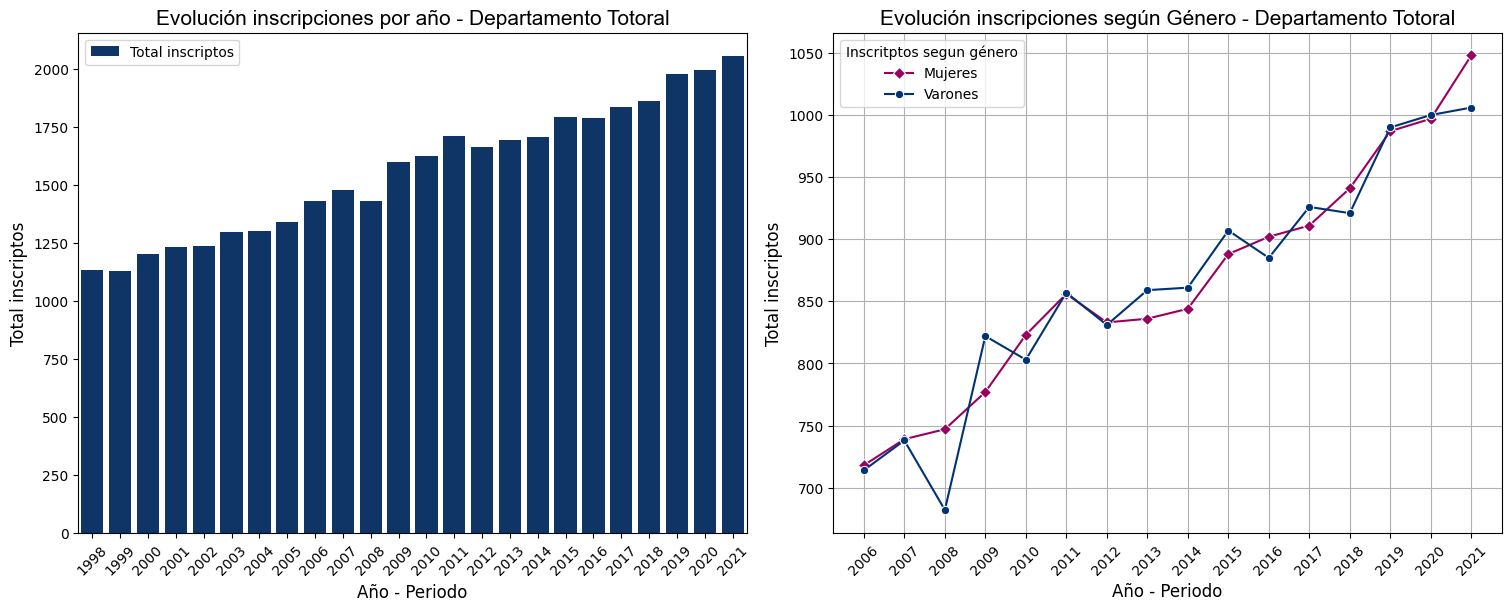

In [41]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(15, 6), layout='constrained')

sns.barplot(x= alumnos_inscriptos_totoral['Año'], y= alumnos_inscriptos_totoral['Total inscriptos'], 
                    label='Total inscriptos', color='#003376', ax=ax[0])

# Añadimos título y etiquetas a los ejes
ax[0].set_title('Evolución inscripciones por año - Departamento Totoral',
               fontdict={'fontsize': 15, 'fontfamily':'Arial'})
ax[0].set_xlabel('Año - Periodo', fontsize=12)
ax[0].set_ylabel('Total inscriptos', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend()

sns.lineplot(x= incrpitos_secundario_segun_genero_totoral['Año'], y= incrpitos_secundario_segun_genero_totoral['Mujeres'], 
             label='Mujeres', marker='D', color='#9B005f', ax=ax[1])
sns.lineplot(x= incrpitos_secundario_segun_genero_totoral['Año'], y= incrpitos_secundario_segun_genero_totoral['Varones'], 
             label='Varones', marker='o', color='#003376', ax=ax[1])

ax[1].set_title('Evolución inscripciones según Género - Departamento Totoral',
               fontdict={'fontsize': 15, 'fontfamily':'Arial'})
ax[1].set_xlabel('Año - Periodo', fontsize=12)
ax[1].set_ylabel('Total inscriptos', fontsize=12)
ax[1].grid()
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Inscritptos segun género')


# Mostramos el gráfico
plt.show()

In [42]:
leer_datos_alumnos_con_sobreedad= pd.read_csv('datos_escuelas_secundaria/alumnos_con_sobredad_secundario_1998-2021.csv',sep=';')

In [43]:
df_alumnos_con_sobreedad= pd.DataFrame(leer_datos_alumnos_con_sobreedad)

df_alumnos_con_sobreedad.head(3)

,Departamento,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Calamuchita,"30,2","36,1","30,9",33,"30,3","28,4","32,4","32,3","27,9",...,"31,9","31,2","29,4","26,4","28,4","26,3",25,"24,4",24,23
1,Capital,"33,5",33,"33,5","34,1",34,"33,4","31,7","31,7","29,5",...,"33,7","31,6",30,"29,5","28,5","26,5","25,6","24,5",24,"23,3"
2,Colon,"33,4","33,9","32,7",33,"34,5","31,5","30,4","30,9","30,1",...,"34,9","30,5",29,"26,6","27,2","24,8","24,7","23,7","22,9","20,3"


In [44]:
alumnos_con_sobreedad_totoral= df_alumnos_con_sobreedad.iloc[23]

alumnos_con_sobreedad_totoral= pd.DataFrame(alumnos_con_sobreedad_totoral)

alumnos_con_sobreedad_totoral.head(3)

,23
Departamento,Totoral
1998,"36,3"
1999,"46,7"


In [45]:
alumnos_con_sobreedad_totoral.reset_index(inplace= True)

alumnos_con_sobreedad_totoral= alumnos_con_sobreedad_totoral.drop(0)

alumnos_con_sobreedad_totoral.head(3)

,index,23
1,1998,"36,3"
2,1999,"46,7"
3,2000,"45,2"


In [46]:
alumnos_con_sobreedad_totoral= alumnos_con_sobreedad_totoral.rename(columns={'index':'Año', 23:'Porcentaje anual'})

alumnos_con_sobreedad_totoral['Porcentaje anual']= alumnos_con_sobreedad_totoral['Porcentaje anual'].str.replace(',','.').astype(float)

alumnos_con_sobreedad_totoral.head(3)

,Año,Porcentaje anual
1,1998,36.3
2,1999,46.7
3,2000,45.2


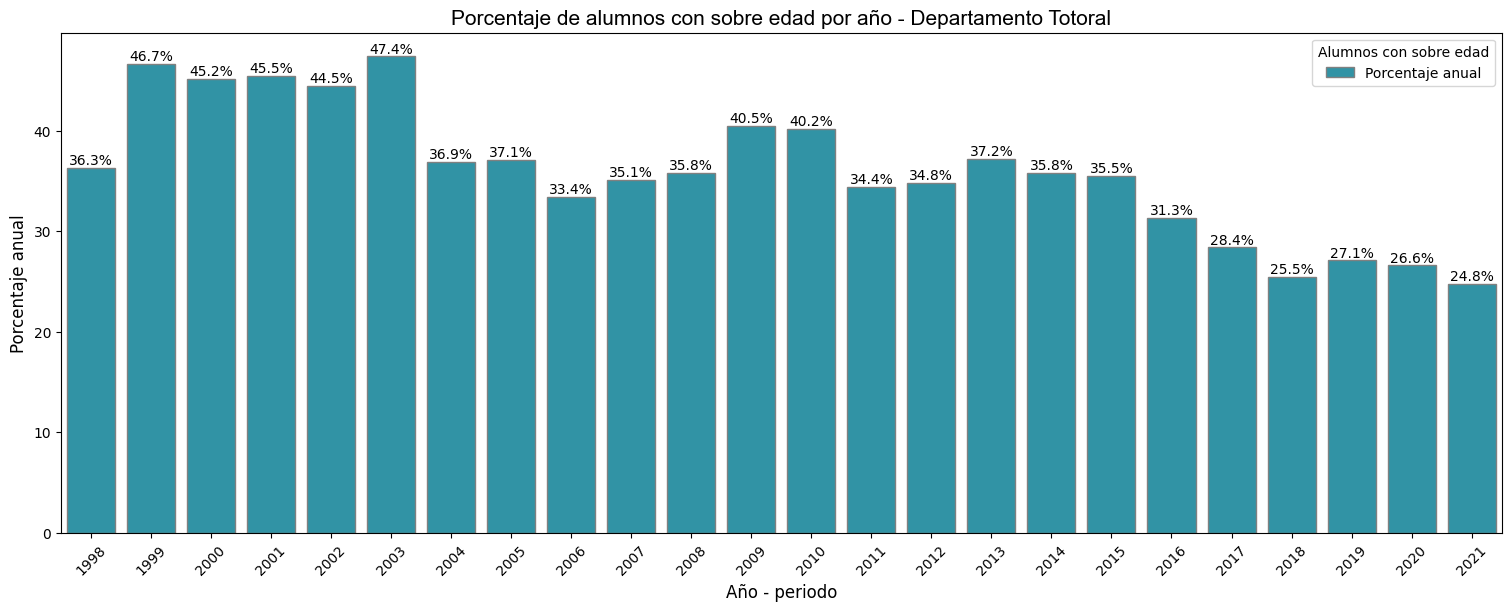

Promedio de alumnos con sobre edad durante el periodo 1998 - 2021: 36.08333333333333 %


In [47]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(15, 6), layout='constrained')

sns.barplot(x=alumnos_con_sobreedad_totoral['Año'], y=alumnos_con_sobreedad_totoral['Porcentaje anual'],
           color='#1EA1B8', edgecolor='grey' ,label='Porcentaje anual', ax=ax)

ax.set_title('Porcentaje de alumnos con sobre edad por año - Departamento Totoral', 
             fontdict={'fontfamily':'Arial', 'fontsize':15})
ax.set_ylabel('Porcentaje anual', fontsize=12)
ax.set_xlabel('Año - periodo', fontsize=12)

ax.tick_params(axis='x', rotation=45)

for i, porcentaje in enumerate(alumnos_con_sobreedad_totoral['Porcentaje anual']):
    ax.text(i, porcentaje + 0.05, str(round(porcentaje, 2)) + '%', ha='center', va='bottom')

ax.legend(title='Alumnos con sobre edad')

plt.show()

print('Promedio de alumnos con sobre edad durante el periodo 1998 - 2021:', np.mean(alumnos_con_sobreedad_totoral['Porcentaje anual']),'%')

In [48]:
leer_datos_alumnos_repitentes= pd.read_csv('datos_escuelas_secundaria/alumnos_repitentes_secundario_2000-2021.csv',sep=';')

leer_datos_alumnos_repitentes_segun__genero= pd.read_csv('datos_escuelas_secundaria/alumnos_repitentes_secundario_segun_genero_2000-2021.csv',sep=';')

In [49]:
df_alumnos_repitentes= pd.DataFrame(leer_datos_alumnos_repitentes)

df_alumnos_repitentes.head(3)

,Departamento,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Calamuchita,"10,5","10,7","9,5","8,7","7,9","11,7",8,"11,1","13,5",...,"8,1","9,1","7,1","5,9",7,"7,5","6,4","5,7","6,8","5,5"
1,Capital,"10,3","9,7","8,8","8,4","8,1","8,6","9,3","9,7","11,7",...,"9,6","8,7","9,1","7,4","7,4","7,9","7,3","6,9","6,4","6,1"
2,Colon,"10,8","9,4","9,1","7,8","6,7","7,1","8,1","10,2","11,3",...,"9,3","10,5","9,7","7,4","8,2","7,8","7,5","6,6","6,1","3,5"


In [50]:
alumnos_repitentes_totoral_secundario= df_alumnos_repitentes.iloc[23]

alumnos_repitentes_totoral_secundario= pd.DataFrame(alumnos_repitentes_totoral_secundario)

alumnos_repitentes_totoral_secundario.head(3)

,23
Departamento,Totoral
1998,"15,6"
1999,"9,3"


In [51]:
alumnos_repitentes_totoral_secundario.reset_index(inplace= True)

alumnos_repitentes_totoral_secundario= alumnos_repitentes_totoral_secundario.drop(0)

alumnos_repitentes_totoral_secundario.head(3)

,index,23
1,1998,"15,6"
2,1999,"9,3"
3,2000,"19,9"


In [52]:
alumnos_repitentes_totoral_secundario= alumnos_repitentes_totoral_secundario.rename(
                                                                                    columns={'index':'Año', 23:'Porcentaje anual'})

alumnos_repitentes_totoral_secundario['Porcentaje anual']= alumnos_repitentes_totoral_secundario['Porcentaje anual'].str.replace(',','.').astype(float)

alumnos_repitentes_totoral_secundario.head(3)

,Año,Porcentaje anual
1,1998,15.6
2,1999,9.3
3,2000,19.9


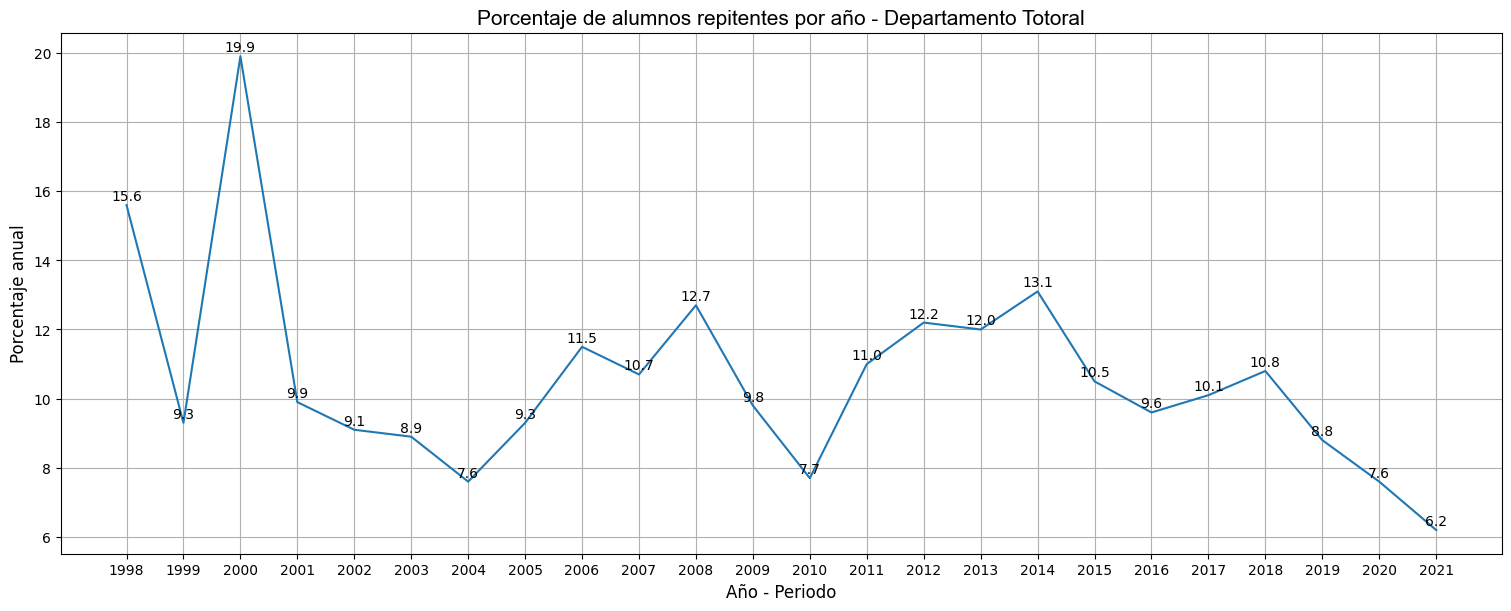

In [53]:
fig, ax= plt.subplots(nrows=1, ncols=1, layout='constrained', figsize=(15, 6))

sns.lineplot(x= alumnos_repitentes_totoral_secundario['Año'], y= alumnos_repitentes_totoral_secundario['Porcentaje anual'], 
            ax=ax)

ax.set_title('Porcentaje de alumnos repitentes por año - Departamento Totoral', 
            fontdict={'fontfamily':'Arial', 'fontsize':15})
ax.set_xlabel('Año - Periodo', fontsize=12)
ax.set_ylabel('Porcentaje anual', fontsize=12)
ax.grid()

for i, porcentaje in enumerate(alumnos_repitentes_totoral_secundario['Porcentaje anual']):
    ax.text(i, porcentaje + 0.05, round(porcentaje, 2), ha='center', va='bottom')